In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data
# TODO: replace with path to cleaned data
DATA_PATH = "../cleaned_data_combined.csv"
data = pd.read_csv(DATA_PATH)

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6-7,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza
...,...,...,...,...,...,...,...,...,...,...
1639,413395,2,3-5,"Week day dinner,Weekend dinner",5-Mar,Romantic Movies,Soup,"Parents,Siblings,Friends",NaN,Sushi
1640,386750,3,4 to 5,"Week day lunch,Weekend lunch",About 12 to 15 dollars,One Piece Film Gold,Water,Friends,A little (mild),Sushi
1641,617178,2,"It has a minimum of two ingredients, and on av...","Week day lunch,Weekend lunch,At a party",10 dollars,I think of the anime Food Wars,Nothing in particular– probably just water,Parents,NaN,Sushi
1642,630128,1,3 or a finite amount more,"Week day lunch,Weekend lunch,Late night snack",$1 or less (for a single roll),John Wick 3,Any tea,"Siblings,Friends,Strangers",A little (mild),Sushi


In [68]:
# Expected data:
# Q1: Categorical, complexity to make the food
# Q2: Numerical, number of ingredients
# Q3: Categorical, setting where the food is served
# Q4: Numerical, cost of the food
# Q5: Categorical, what movie goes with the food
# Q6: Categorical, what drink goes with the food
# Q7: Categorical, what people goes with the food
# Q8: Categorical, how much hot sauce

numerical_columns = [2, 4] # TODO: add 2, 4
categorical_columns = [3, 5, 6, 7, 8]

<Figure size 640x480 with 0 Axes>

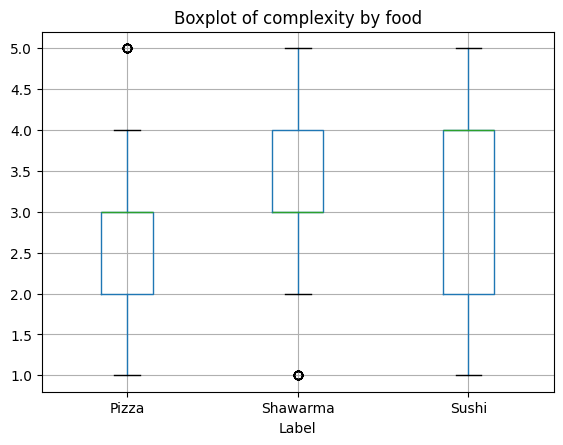

In [61]:
# Plot a bar, where each boxplot corresponds to a different food
plt.figure()
data.boxplot(column='Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)', by='Label')
plt.title(f"Boxplot of complexity by food")
plt.suptitle("")
plt.show()


/var/folders/rt/x1pynv8j1fb1hkbhs6y9v62m0000gn/T/ipykernel_82002/792564141.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


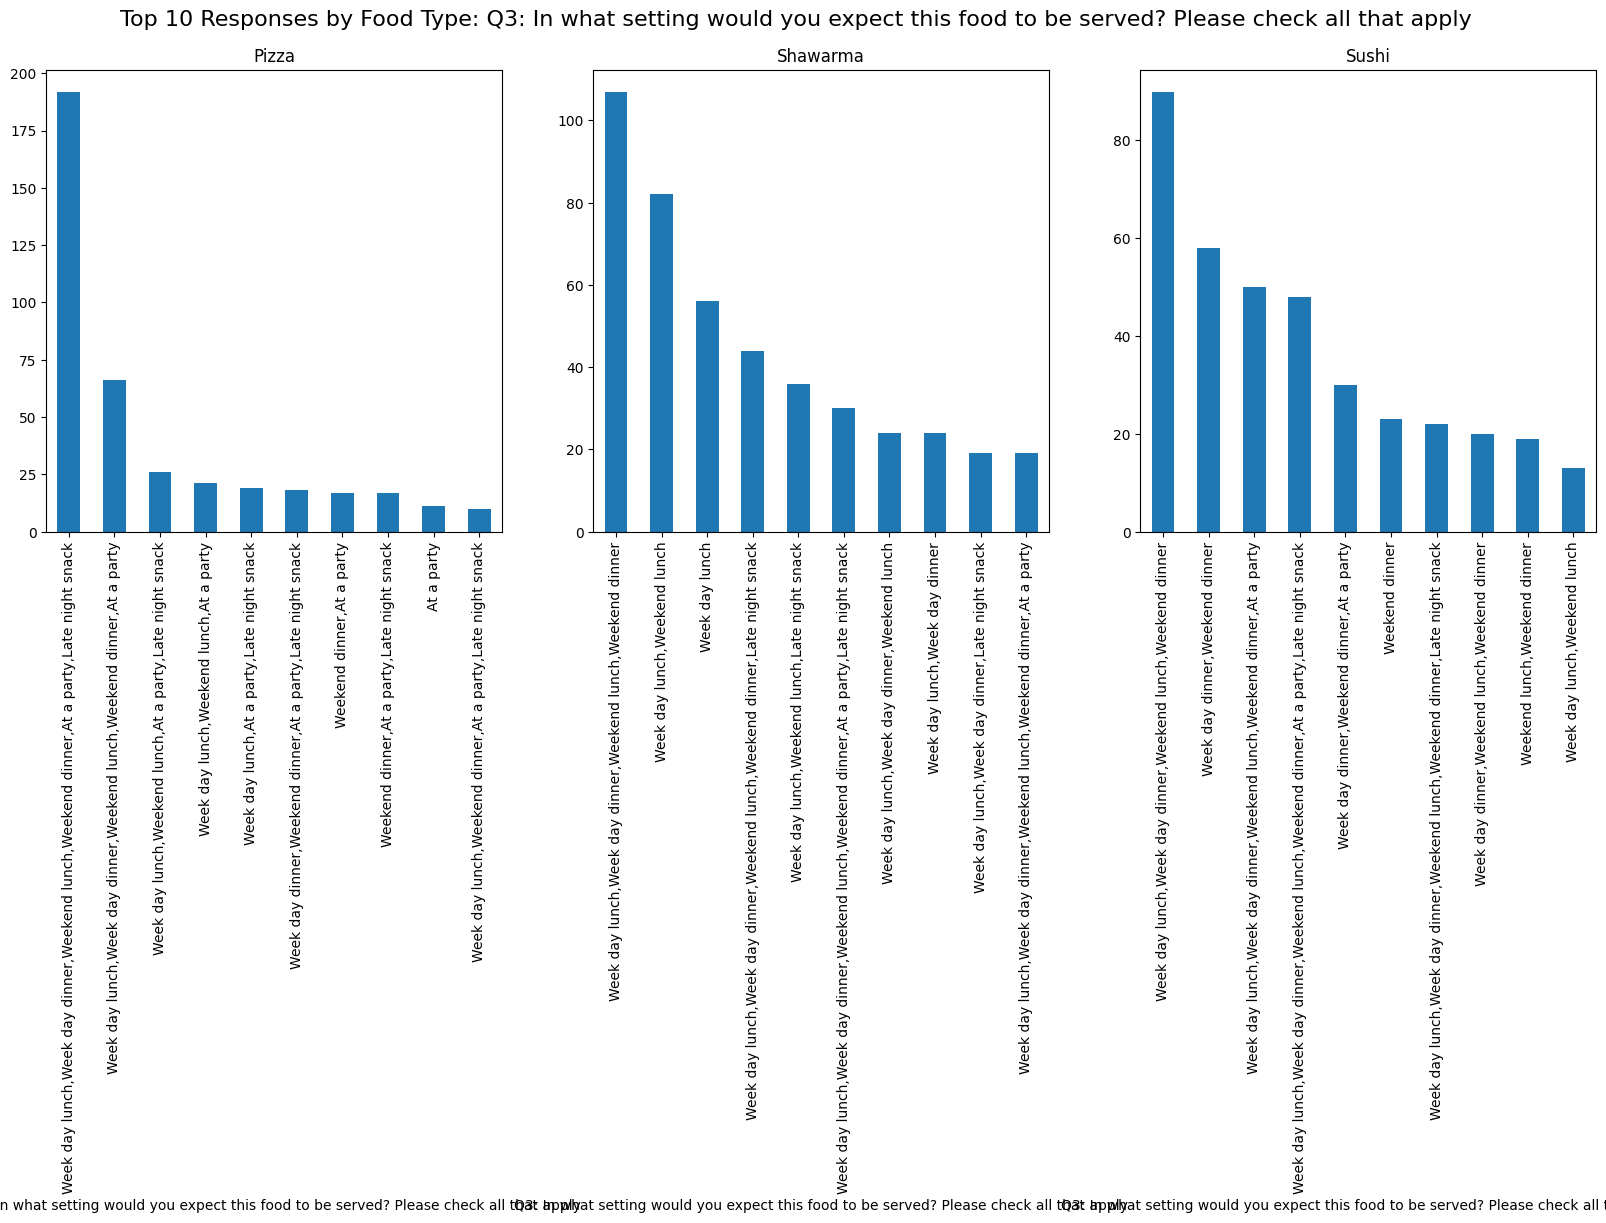

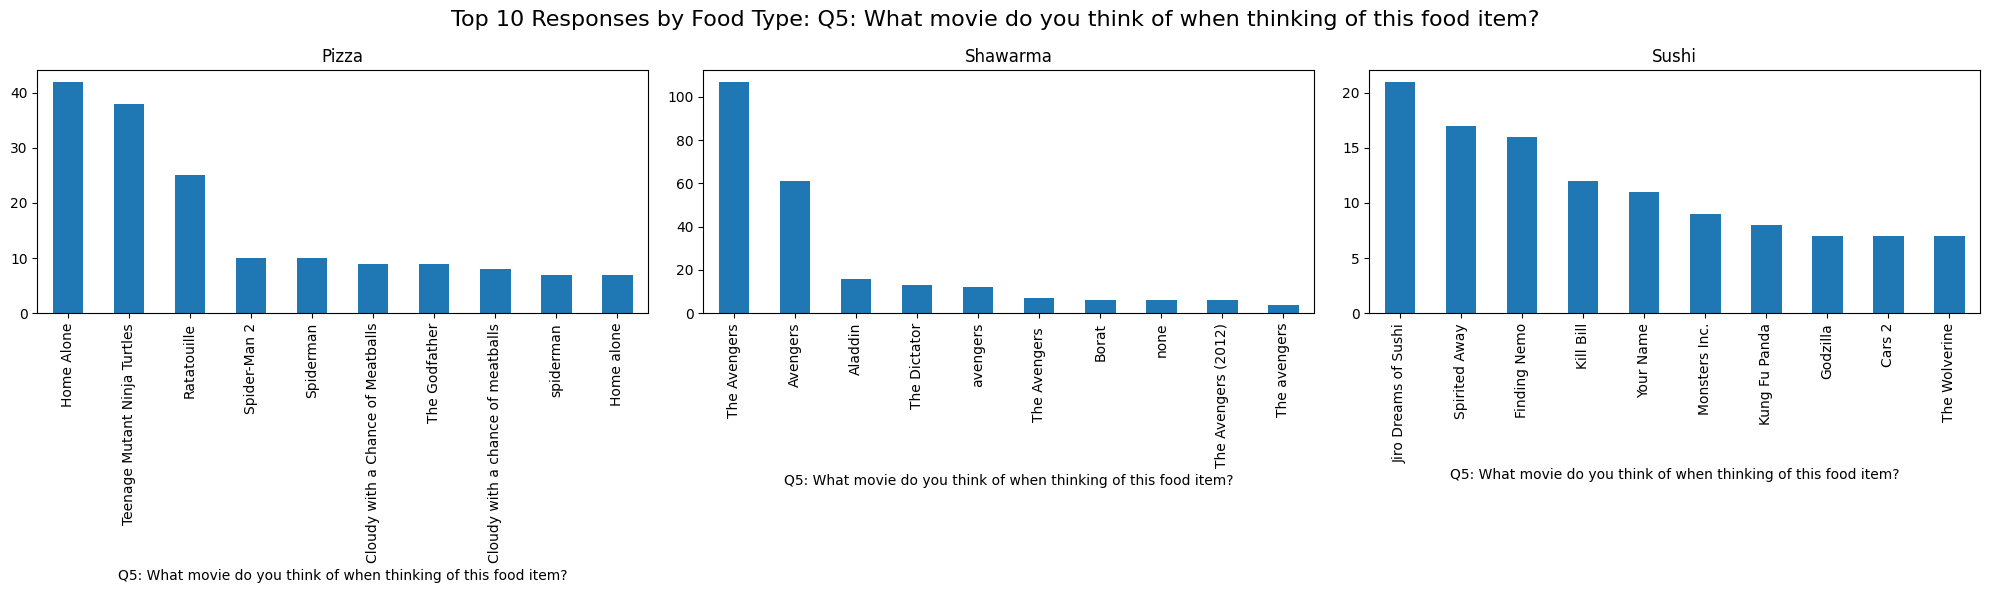

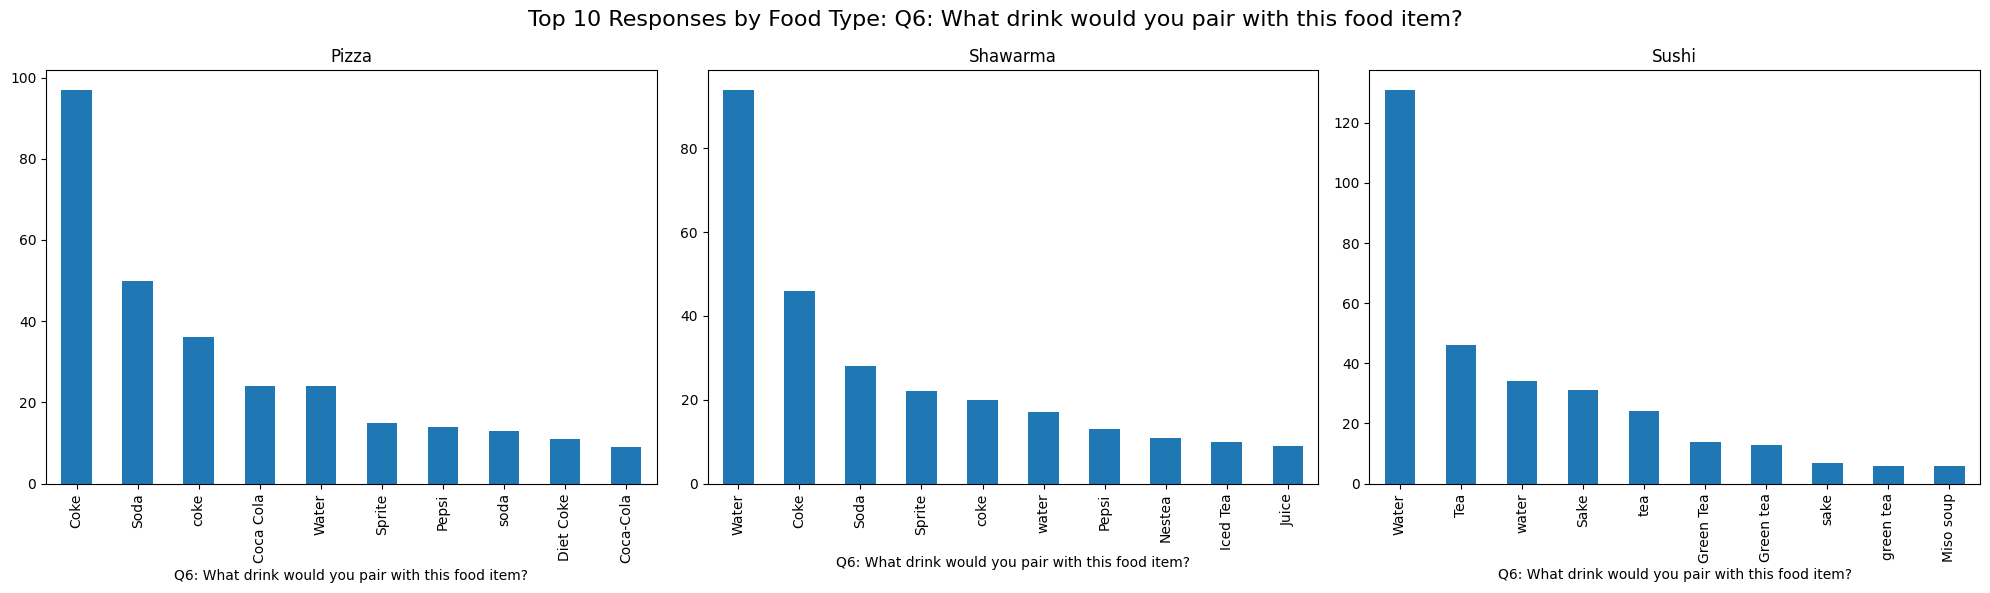

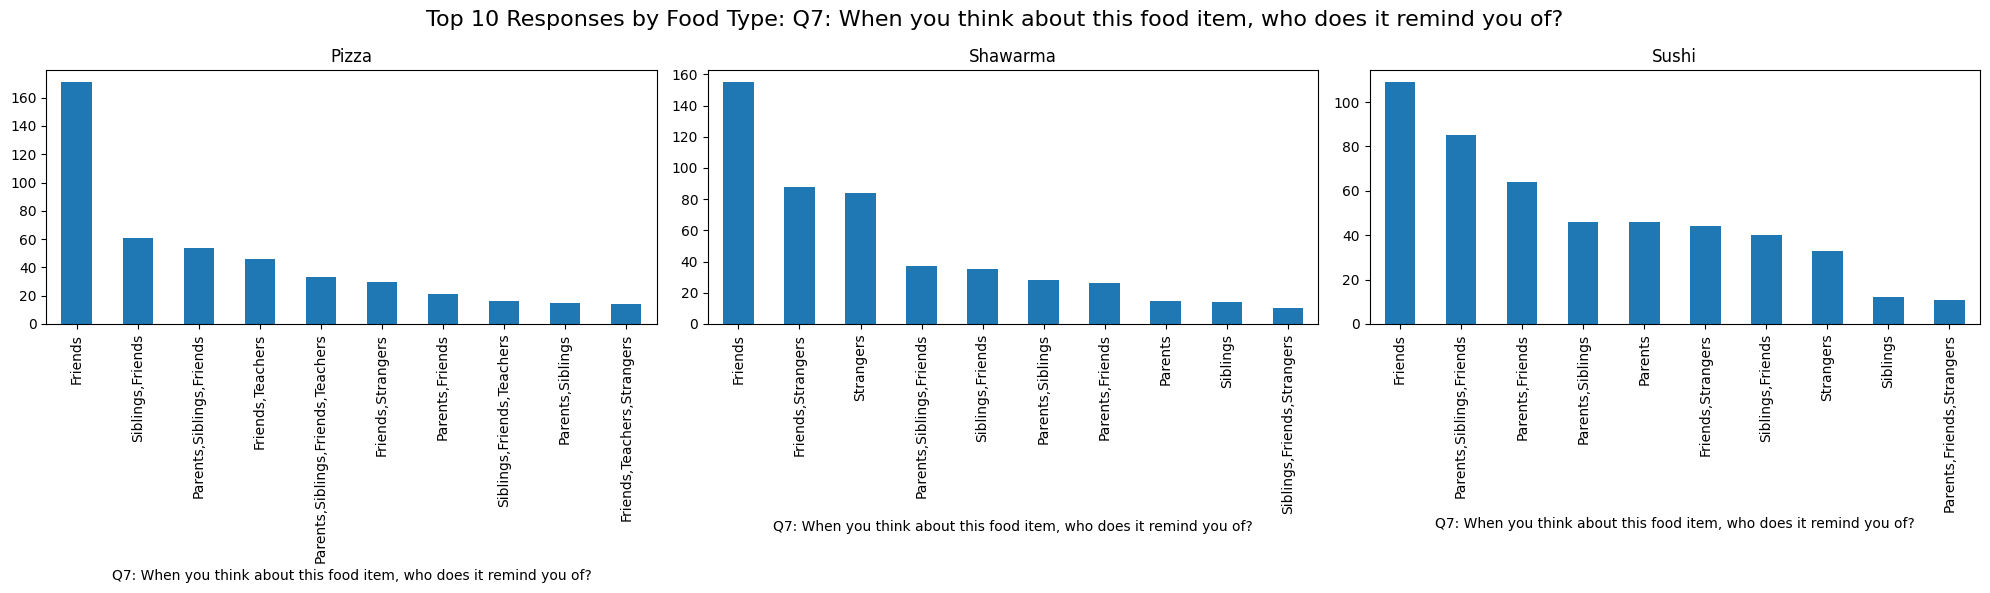

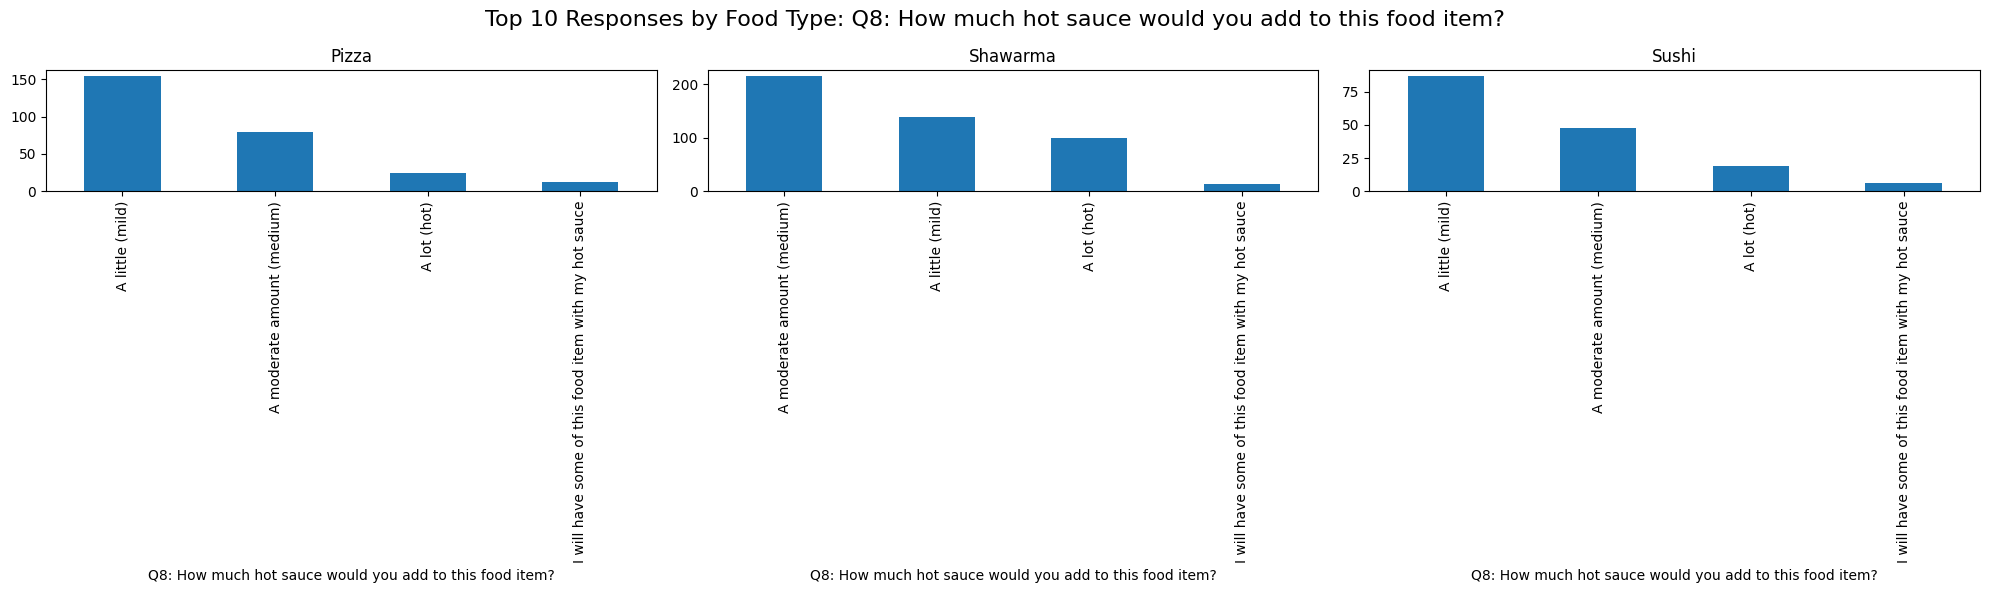

In [83]:
# Movies
# Visualize all categorical columns
categorical_columns = [3, 5, 6, 7, 8]

# Get the unique food labels
labels = data["Label"].unique()

# Create a visualization for each categorical column
for col_idx in categorical_columns:
    column = data.columns[col_idx]  # Get the actual column name directly from DataFrame
    
    # Create subplots - one for each food label
    fig, axes = plt.subplots(1, len(labels), figsize=(20, 6))
    fig.suptitle(f"Top 10 Responses by Food Type: {column}", fontsize=16)
    
    # Loop through labels and create each subplot
    for i, label in enumerate(labels):
        # Get the top 10 responses for this food item and column
        top_responses = data[data["Label"] == label][column].value_counts().head(10)
        
        # Plot as bar chart in the corresponding subplot
        top_responses.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{label}")
        
        # Only show y-label for the first subplot to reduce redundancy
        if i > 0:
            axes[i].set_ylabel("")
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()


In [71]:
# Do a box plot for each numerical column
numerical_columns_data = data.iloc[:, numerical_columns].columns
for column in numerical_columns_data:
    plt.figure()
    data.boxplot(column=data.columns[column])
    plt.title(f"Boxplot of {data.columns[column]}")
    plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 640x480 with 0 Axes>